# Table of Contents
* [1. Introduction](#introduction)
* [2. Import Libraries](#libraries)
* [3. Load Dataset](#dataset)
* [4. Summarize Data](#summarize-data)
* [5. Algorithm Evaluation](#eval)
* [6. Prepare Data](#prepare)
* [7. Finalize Model](#finalize-model)
* [8. Test Model](#test-model)
* [9. Conclusion](#conclusion)

# 1. Introduction <a id="introduction"></a>

This is a binary classification problem which will mark the transactions either as fraudulent or non-fraudulent based on the trained model on the [Kaggle dataset](https://www.kaggle.com/datasets/yashpaloswal/fraud-detection-credit-card).

## Crecit Card Fraud Detection 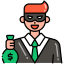

Credit card fraud can occur when unauthorized users gain access to an individual's credit card information in order to make purchases, other transactions, or open new accounts. A few examples of credit card fraud include account takeover fraud, new account fraud, cloned cards, and cards-not-present schemes. This unauthorized access occurs through phishing, skimming, and information sharing by a user, oftentimes unknowingly. However, this type of fraud can be detected through means of artificial intelligence and machine learning as well as prevented by issuers, institutions, and individual cardholders. According to a 2021 annual report, about 50% of all Americans have experienced a fraudulent charge on their credit or debit cards, and more than one in three credit or debit card holders have experienced fraud multiple times. This amounts to 127 million people in the US that have been victims of credit card theft at least once [*](https://en.wikipedia.org/wiki/Credit_card_fraud).

# 2. Import Libraries <a class='anchor' id="libraries"></a> 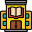

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
sb.set_theme(style='whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Linear Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Non-linear Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Metrics to evaluate performance
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# 3. Load Dataset <a id="dataset"></a> 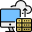

In [2]:
df = pd.read_csv('Data/creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


# 4. Summarize Data <a id='summarize-data'></a> 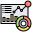

In [3]:
df.describe(include='all').transpose() #.transpose() to see all columns

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.758702e-12,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,-8.252296e-13,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-9.637438e-13,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,8.316234e-13,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.592013e-13,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,4.247308e-13,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-3.050183e-13,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,8.692882e-14,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-1.179710e-12,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [4]:
# Check for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
class     0
dtype: int64

In [5]:
# Check for data types
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
class       int64
dtype: object

In [6]:
# Since it's a classification problem converting class feature into object
df['class'] = df['class'].astype('object')
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
class      object
dtype: object

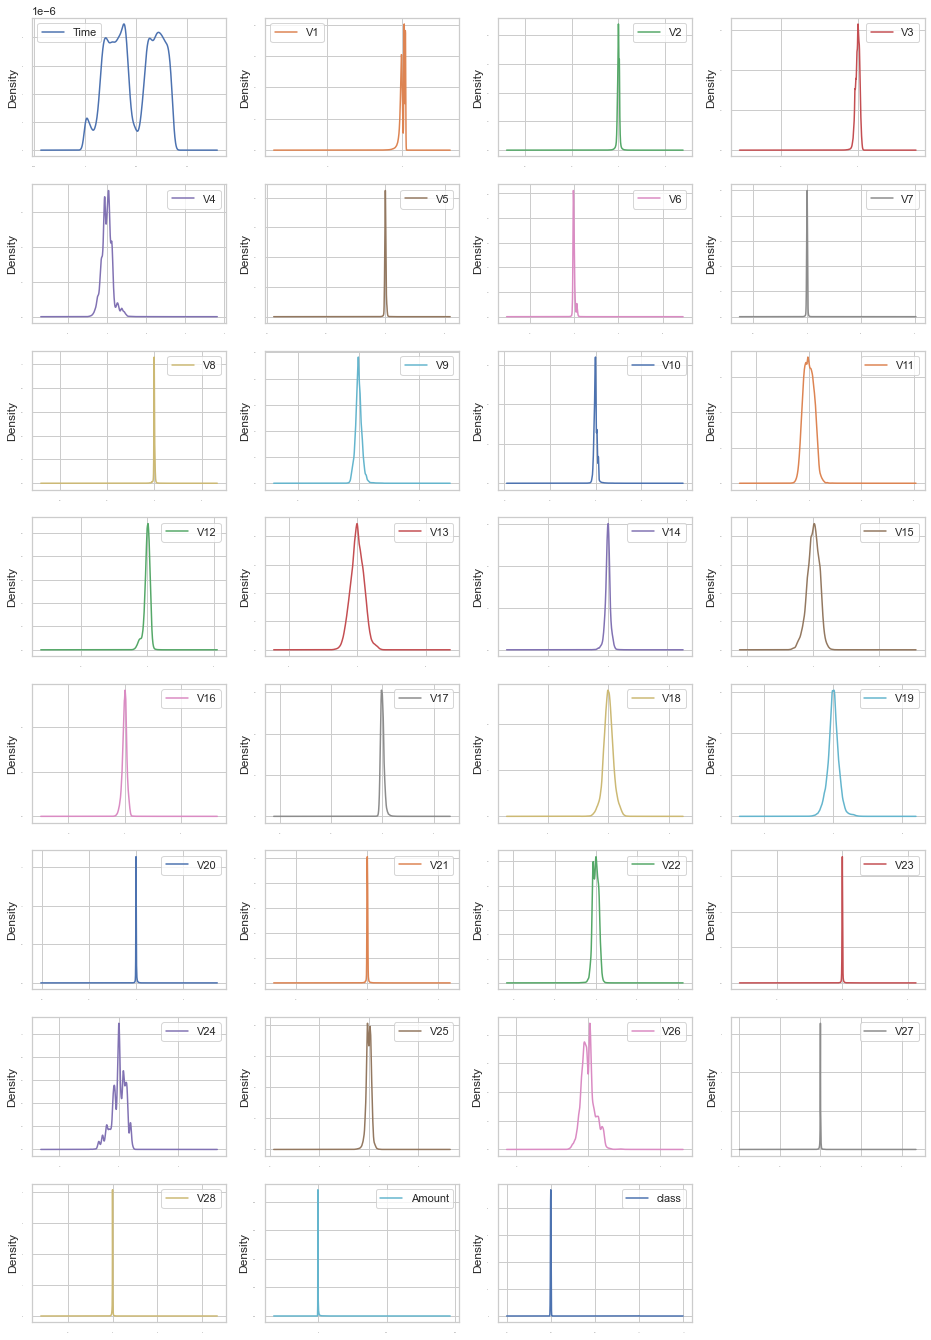

In [7]:
# Check the distribution of the numerical features
df.plot(kind='density', subplots=True, layout=(8,4), sharex=False, legend=True, 
                                            fontsize=1, figsize=(16,24))
plt.show()

 **Observation:**

<div style="background-color:#fcf8e3;border-color:#faebcc;color:#555555;">Almost all the features, look like, follow the normal distribution. However, it's better to check again after getting a subset of the dataset.</div>

0    284315
1       492
Name: class, dtype: int64

Ratio of the transactions which are not fradulent: 99.83%
Ratio of the transactions which are fradulent: 0.17%


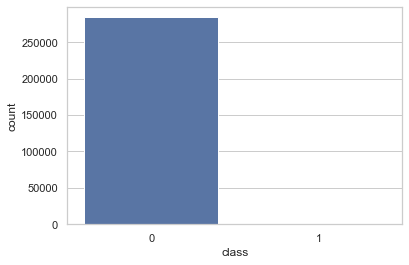

In [8]:
sb.countplot(x=df['class'])

print(df['class'].value_counts())

no_fradulent = (df['class'].value_counts()[0] / len(df['class'])) * 100
fradulent = (df['class'].value_counts()[1] / len(df['class'])) * 100
print('\nRatio of the transactions which are not fradulent: %.2f%%' % no_fradulent)
print('Ratio of the transactions which are fradulent: %.2f%%' % fradulent)

 **Observation:**
<div style="background-color:#fcf8e3;border-color:#faebcc;color:#555555;"> As can be seen from the previous cell the dataset is highly imbalanced state. Even if ramdomly we say that any transaction is not fraudalent, we have <b>99.83%</b> chance that we're right. That's why we need to bring the dataset into balance either using Random undersampling or oversampling using SMOTE. In addition, we need to use StratifiedKFold while evaluating candidate algorithms.</div>

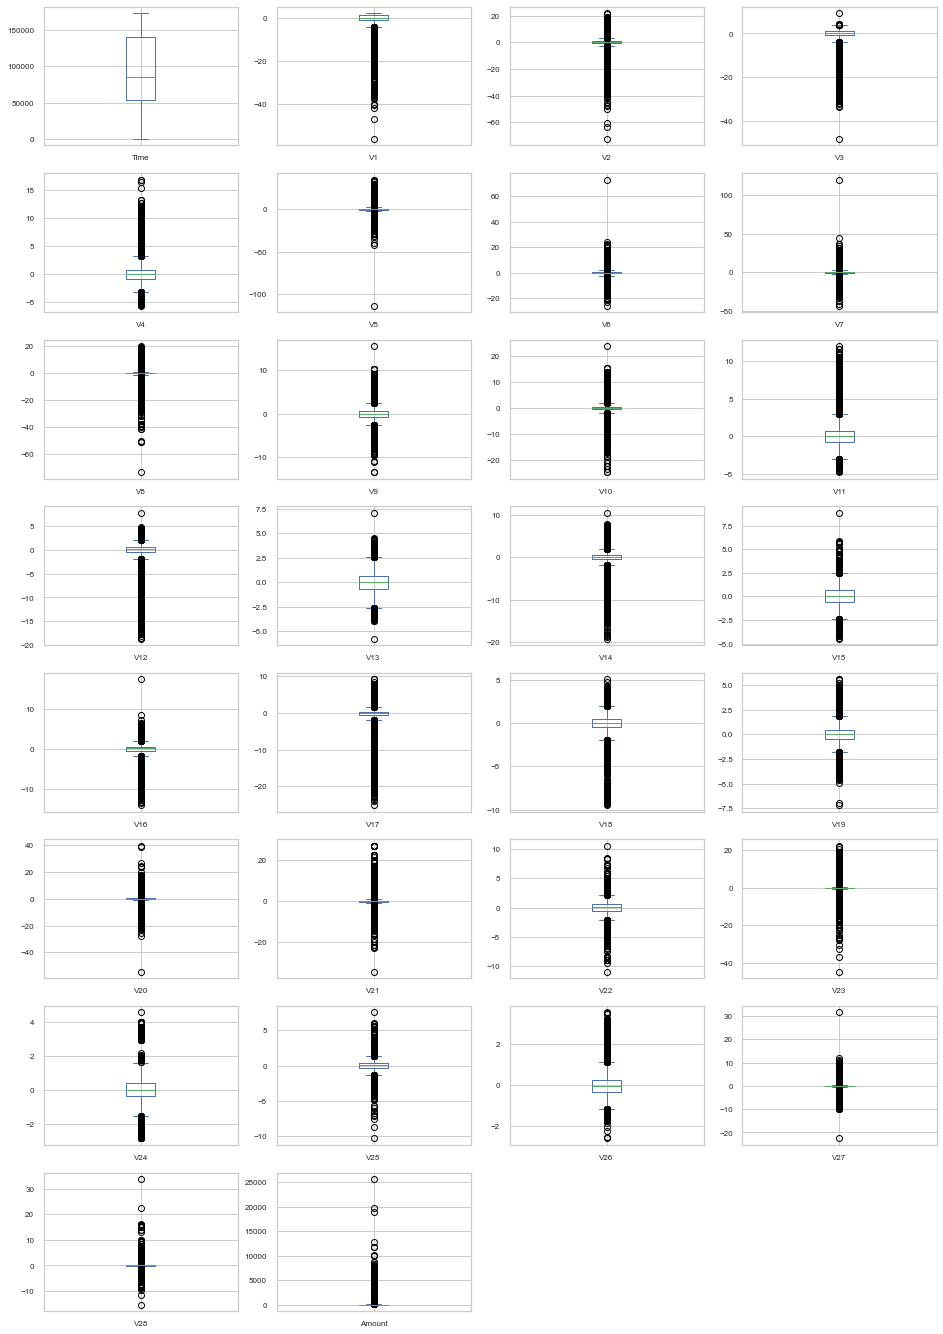

In [9]:
df.drop('class', axis=1).plot(kind='box', subplots=True, layout=(8,4), sharex=False, 
                             legend=True, fontsize=8, figsize=(16,24))
plt.show()

 **Observation:**
<div style="background-color:#fcf8e3;border-color:#faebcc;color:#555555;"> As you can see there are alot of outliers in most of the feature. If we remove them now, it may increase the imbalanced state of the dataset. That's why while pre-processing the data, we should first focus on balancing it, then detect and remove the outliers in the balanced dataset.</div>

/var/folders/xm/3h6hfxmn0158s2wvp_w5r6700000gn/T/ipykernel_63469/399382268.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(cax)


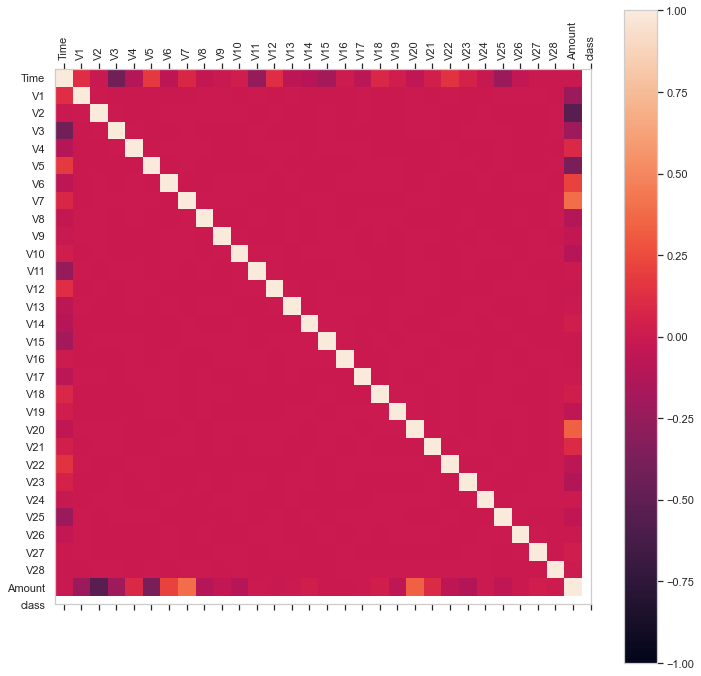

In [10]:
# Correlation
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none')
ax.grid(False)
fig.colorbar(cax)
ticks = np.arange(0, len(df.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.columns)
plt.show()

 **Observation:**
<div style="background-color:#fcf8e3;border-color:#faebcc;color:#555555;">There are some features that have high correlation to eachother such as Time and V3, V5 and Amount and etc. This might have a negative impact on the performance of the model. It's better to apply some kind of feature selection method to eleminate this impact.</div>

# 5. Algorithm Evaluation <a id='eval'></a> 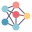

In [11]:
# Constants for training and evaluation options
n_fold = 10
scr = 'accuracy'

In [18]:
# Create a function that evaluates different algorithms can be used for each update on the model
def evaluate_algorithms(x, y):
    models = []
    models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC(gamma='auto')))
    
    names = []
    results = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=n_fold, random_state=seed, shuffle=True)
        cv_results = cross_val_score(model, x, y, cv=kfold, scoring=scr)
        results.append(cv_results)
        names.append(name)
        msg = '%s - Mean ACC: %.2f%% STD(%.2f)' % (name, cv_results.mean()*100, cv_results.std())
        print(msg)
        
     # Plot the results
    fig = plt.figure(figsize=(8,8))
    fig.suptitle('Algorithm Comparison', fontsize=16, y=0.93)
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names, fontsize=14)
    plt.show()

# 6. Prepare Data <a id='prepare'></a> 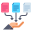

## 6.1. Drop Duplicates

In [13]:
nr_rows = df.shape[0]
print('Number of rows: %d' % nr_rows)
df = df.drop_duplicates().reset_index(drop=True)
print('%d duplicates removed' % (nr_rows - df.shape[0]))
print('Number of rows after removal of duplicates: %d' % (df.shape[0]))

Number of rows: 284807
1081 duplicates removed
Number of rows after removal of duplicates: 283726


## 6.2. Train Test Split

In [14]:
seed = 101

x = df.drop('class', axis=1)
y = df['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

LR - Mean ACC: 99.90% STD(0.00)
LDA - Mean ACC: 99.94% STD(0.00)
KNN - Mean ACC: 99.83% STD(0.00)
CART - Mean ACC: 99.92% STD(0.00)
NB - Mean ACC: 99.27% STD(0.00)


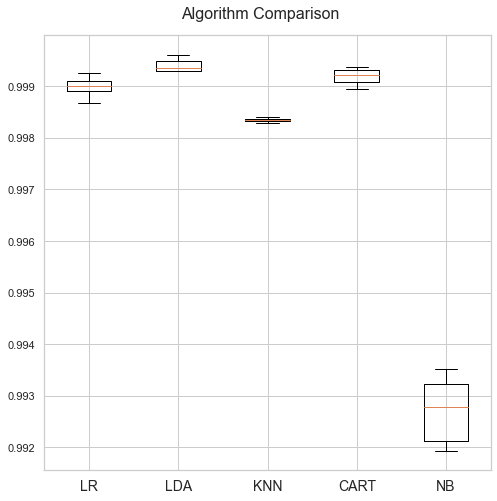

In [17]:
# Evaluating algorithms for the baseline
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_cat = label_encoder.fit_transform(y_train)
evaluate_algorithms(x_train, y_train_cat)

 **Observation:** 

<div style="background-color:#fcf8e3;border-color:#faebcc;color:#555555;"> Eventhough LDA provide 99.94% accuracy, these results are <ins>deceptive</ins> due to the reason that we mentioned above while checking if the dataset is balanced. The dataset is imbalanced and it's easy to guess a transaction as non-fraudulent. That's why firts we need to use under or over sampling techniques to make the dataset balanced, then we can train the algorithms.</div>

## 6.3. Random Under Sampling

In [19]:
from imblearn.under_sampling import RandomUnderSampler

# Number of the items in the minority class will be 50% of the majority class
under_sampler = RandomUnderSampler(sampling_strategy=0.5)
x_under, y_under = under_sampler.fit_resample(x_train, y_train_cat)
print('Under sampled shape of X: ', x_under.shape)
print('Under sampled shape of y: ', y_under.shape)

Under sampled shape of X:  (1152, 30)
Under sampled shape of y:  (1152,)


In [20]:
# Check the ratio of classes after undersampling
pd.DataFrame(y_under).value_counts()

0    768
1    384
dtype: int64

LR - Mean ACC: 93.58% STD(0.02)
LDA - Mean ACC: 92.28% STD(0.02)
KNN - Mean ACC: 71.79% STD(0.03)
CART - Mean ACC: 93.06% STD(0.02)
NB - Mean ACC: 90.37% STD(0.03)
SVM - Mean ACC: 66.84% STD(0.00)


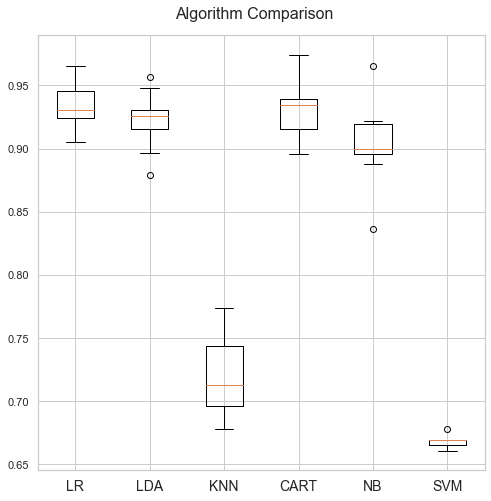

In [21]:
evaluate_algorithms(x_under, y_under)

 **Observation:**
<div style="background-color:#fcf8e3;border-color:#faebcc;color:#555555;">LDA has the highest accuracy score. It might be a good candidate for hyper parameter tuning. However, it's better to evaluate the performance of the algorithms without outliers and with scaled data.</div>

## 6.4. Outlier Detection

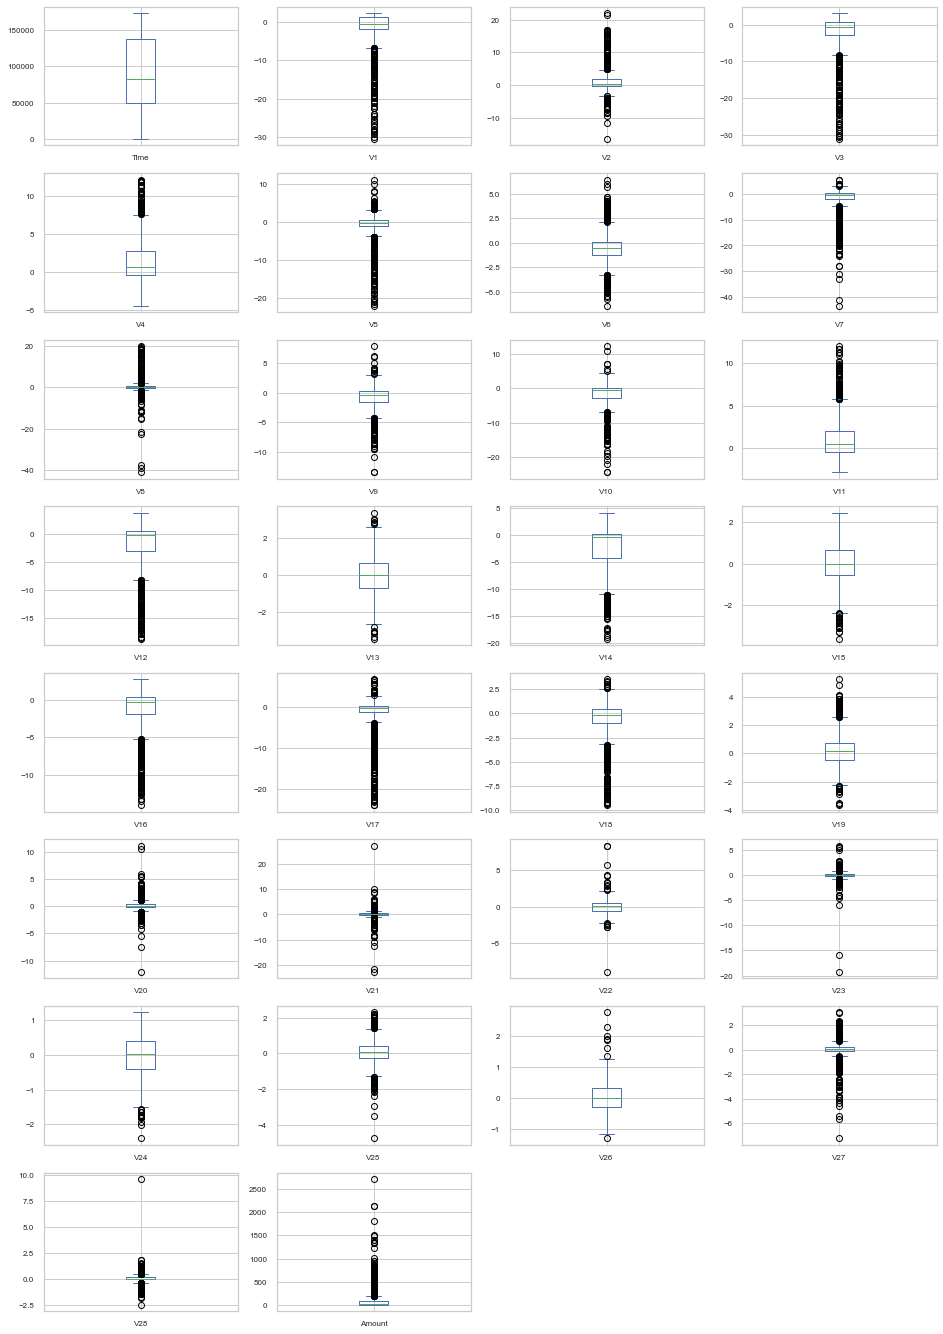

In [22]:
x_under.plot(kind='box', subplots=True, layout=(8,4), sharex=False, 
                             legend=True, fontsize=8, figsize=(16,24))
plt.show()

 **Observation:** 

<div style="background-color:#fcf8e3;border-color:#faebcc;color:#555555;">As can be seen on the above graph most of the features have many outliers which should be handled.</div>

In [23]:
# Detect outliers by using Interquartile Range Method (iqr)
for column in x_under.columns:
    # Calculate interquartile range
    q25 = np.percentile(x_under[column], 25)
    q75 = np.percentile(x_under[column], 75)
    iqr = q75 - q25
    print('Percentiles of %s: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (column, q25, q75, iqr))
    # Calculate the outlier cutoff value
    cut_off = iqr * 1.5
    lower_bound = q25 - cut_off
    upper_bound = q75 + cut_off
    print('%s: Lower = %.2f, Upper = %.2f' % (column, lower_bound, upper_bound))
    print('----------------------------')

Percentiles of Time: 25th=48883.250, 75th=136555.750, IQR=87672.500
Time: Lower = -82625.50, Upper = 268064.50
----------------------------
Percentiles of V1: 25th=-1.966, 75th=1.194, IQR=3.160
V1: Lower = -6.71, Upper = 5.93
----------------------------
Percentiles of V2: 25th=-0.333, 75th=1.708, IQR=2.040
V2: Lower = -3.39, Upper = 4.77
----------------------------
Percentiles of V3: 25th=-2.950, 75th=0.606, IQR=3.556
V3: Lower = -8.28, Upper = 5.94
----------------------------
Percentiles of V4: 25th=-0.510, 75th=2.684, IQR=3.194
V4: Lower = -5.30, Upper = 7.48
----------------------------
Percentiles of V5: 25th=-1.187, 75th=0.569, IQR=1.756
V5: Lower = -3.82, Upper = 3.20
----------------------------
Percentiles of V6: 25th=-1.213, 75th=0.139, IQR=1.352
V6: Lower = -3.24, Upper = 2.17
----------------------------
Percentiles of V7: 25th=-1.678, 75th=0.346, IQR=2.024
V7: Lower = -4.71, Upper = 3.38
----------------------------
Percentiles of V8: 25th=-0.198, 75th=0.670, IQR=0.868
V

In [24]:
# Merge the undersampled features dataframe with label numpy array to filter by upper and lower bouds detected above.
df_under = pd.concat([x_under, pd.DataFrame(y_under, columns=['class'])], axis=1)
df_under = df_under.reset_index(drop=True)
df_under.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,60040.0,1.430071,-1.124191,0.414581,-1.475527,-1.401805,-0.260213,-1.157890,0.092593,-1.952663,...,-0.146140,-0.081380,0.062574,-0.033400,0.249109,-0.190487,0.035659,0.005373,15.00,0
1,45996.0,-0.549140,0.250823,2.253462,-0.550426,-0.797374,0.254736,0.181044,0.013263,0.984222,...,-0.060130,0.069771,-0.059598,0.106611,-0.519211,0.931591,-0.379580,-0.192025,49.95,0
2,60504.0,-1.945822,-2.497172,1.137489,-1.119380,-1.236774,-0.221693,-1.146836,0.708218,-2.612870,...,0.439246,0.542571,0.528711,-0.011944,-0.399365,-0.074881,0.006689,-0.154759,256.00,0
3,114812.0,-2.241524,-1.150949,-0.386193,1.785847,2.600470,-1.652676,-0.401608,-0.383147,0.638958,...,-0.197579,1.011641,-0.930949,0.063340,-1.085910,-0.515015,0.850633,0.163786,100.86,0
4,67986.0,-0.241105,1.149122,0.724136,-0.273877,0.777061,-0.166209,0.730358,-0.025174,-0.410034,...,-0.347687,-0.886846,-0.197965,-1.047972,0.050776,0.156243,0.248799,0.085630,2.69,0
5,61965.0,1.180764,-0.091919,1.196761,1.285111,-1.091937,-0.326427,-0.675032,0.152570,1.018170,...,0.102807,0.413935,-0.067655,0.367055,0.462591,-0.252444,0.060088,0.031499,0.01,0
6,161062.0,-0.640637,0.641737,1.014157,-0.510909,0.378666,0.243200,0.316993,-0.097598,0.649291,...,0.309486,1.103809,-0.339180,-0.931282,-0.120146,-0.098074,-0.172264,0.187955,15.94,0
7,163609.0,2.071113,-0.343198,-0.738609,0.107564,-0.290329,-0.271820,-0.527782,0.014174,1.538052,...,-0.197762,-0.468436,0.236528,-1.088604,-0.260101,-0.858516,0.051953,-0.039467,1.00,0
8,59895.0,1.108062,0.329228,1.274126,2.720196,-0.552116,0.076925,-0.294587,0.019926,-0.187385,...,0.091485,0.469611,-0.121192,0.454437,0.569522,0.143474,0.035032,0.033505,18.96,0
9,125819.0,-4.033943,-6.553155,-0.799373,-0.546081,7.943550,-0.149340,-4.411320,1.575625,1.433897,...,0.951103,0.963954,1.550471,0.705478,-1.675332,-0.303018,0.165925,0.484151,54.95,0


In [25]:
# Remove outliers based on the lower and upper bounds detected above
# No need to apply it to the Time feature as it doesn't has any outlier

df_no_outlier = df_under[((df_under['V1'] >= -6.43) & (df_under['V1'] <= 5.70) & 
                        (df_under['V2'] >= -3.48) & (df_under['V2'] <= 4.98) &
                        (df_under['V3'] >= -8.15) & (df_under['V3'] <= 5.92) & 
                        (df_under['V4'] >= -5.61) & (df_under['V4'] <= 7.96) & 
                        (df_under['V5'] >= -3.88) & (df_under['V5'] <= 3.15) & 
                        (df_under['V6'] >= -3.35) & (df_under['V6'] <= 2.30) &
                        (df_under['V7'] >= -4.82) & (df_under['V7'] <= 3.67) & 
                        (df_under['V8'] >= -1.47) & (df_under['V8'] <= 1.9) &
                        (df_under['V9'] >= -4.3) & (df_under['V9'] <= 3.13) & 
                        (df_under['V10'] >= -6.94) & (df_under['V10'] <= 4.51) & 
                        (df_under['V11'] >= -4.39) & (df_under['V11'] <= 6) & 
                        (df_under['V12'] >= -8.24) & (df_under['V12'] <= 5.57) &
                        (df_under['V13'] >= -2.91) & (df_under['V13'] <= 2.8) & 
                        (df_under['V14'] >= -11.8) & (df_under['V14'] <= 7.1) &
                        (df_under['V15'] >= -2.52) & (df_under['V15'] <= 2.59) & 
                        (df_under['V16'] >= -5.2) & (df_under['V16'] <= 3.77) &
                        (df_under['V17'] >= -4.01) & (df_under['V17'] <= 2.93) & 
                        (df_under['V18'] >= -3.09) & (df_under['V18'] <= 2.55) &
                        (df_under['V19'] >= -2.28) & (df_under['V19'] <= 2.58) & 
                        (df_under['V20'] >= -0.99) & (df_under['V20'] <= 1.13) &
                        (df_under['V21'] >= -1.14) & (df_under['V21'] <= 1.35) & 
                        (df_under['V22'] >= -2.22) & (df_under['V22'] <= 2.19) &
                        (df_under['V23'] >= -0.84) & (df_under['V23'] <= 0.8) & 
                        (df_under['V24'] >= -1.55) & (df_under['V24'] <= 1.54) &
                        (df_under['V25'] >= -1.38) & (df_under['V25'] <= 1.44) & 
                        (df_under['V26'] >= -1.2) & (df_under['V26'] <= 1.26) &
                        (df_under['V27'] >= -0.61) & (df_under['V27'] <= 0.81) & 
                        (df_under['V28'] >= -0.37) & (df['V28'] <= 0.46) &
                        (df_under['Amount'] >= 0) & (df_under['Amount'] <= 228.08))]

/var/folders/xm/3h6hfxmn0158s2wvp_w5r6700000gn/T/ipykernel_63469/304980847.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outlier = df_under[((df_under['V1'] >= -6.43) & (df_under['V1'] <= 5.70) &


In [26]:
df_no_outlier.shape

(606, 31)

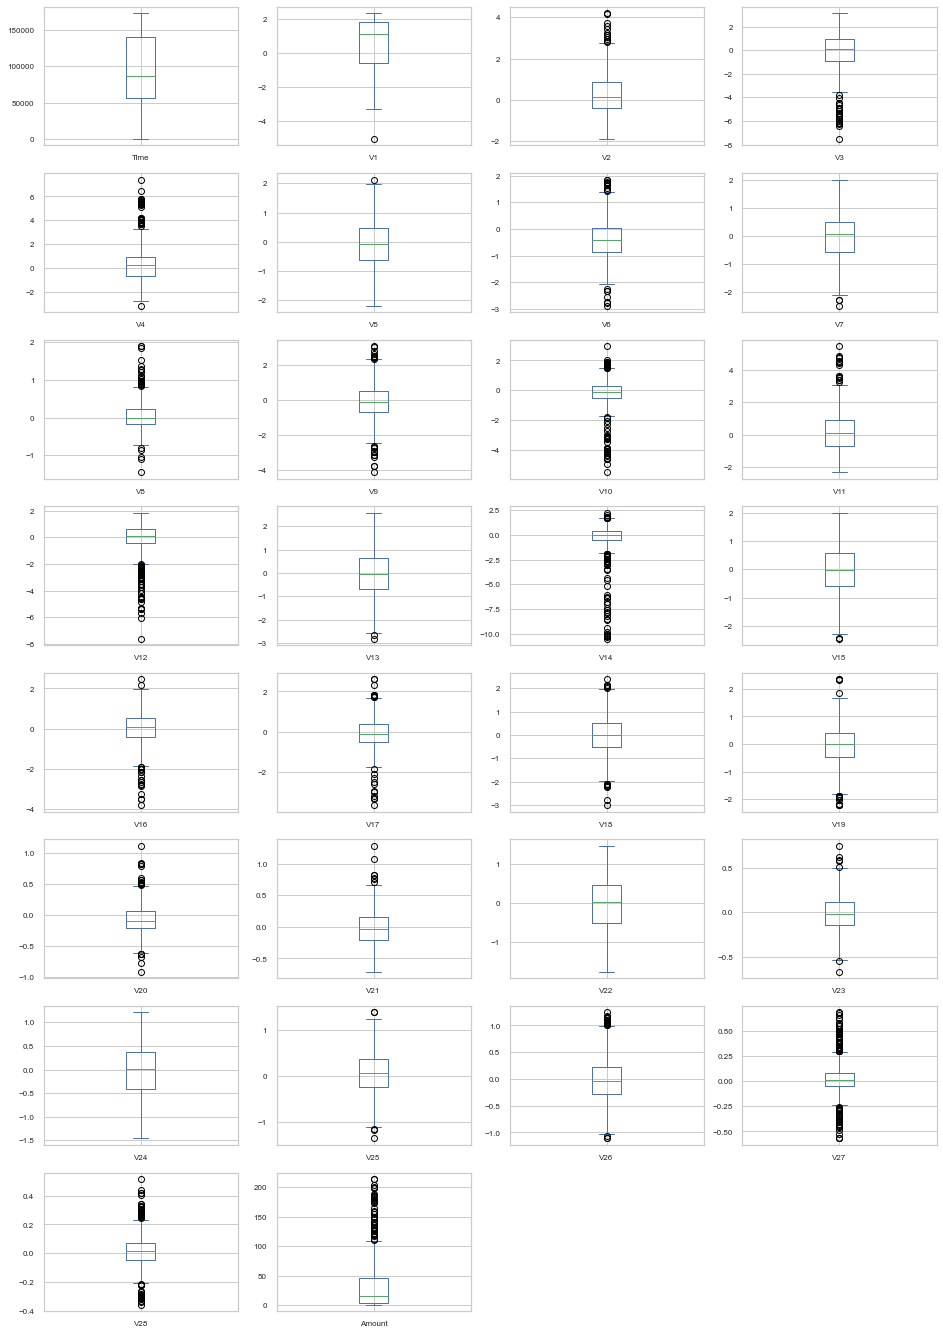

In [27]:
df_no_outlier.drop('class', axis=1).plot(kind='box', subplots=True, layout=(8,4), sharex=False, 
                             legend=True, fontsize=8, figsize=(16,24))
plt.show()

0    551
1     55
Name: class, dtype: int64


<AxesSubplot:xlabel='class', ylabel='count'>

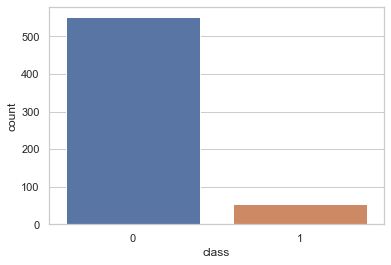

In [28]:
# Let's check the impact on the balance of the dataset.
print(df_no_outlier['class'].value_counts())
sb.countplot(x=df_no_outlier['class'])

 **Observation:** 

<div style="background-color:#fcf8e3;border-color:#faebcc;color:#555555;">Wjile removing outliers we brought back the dataset into imbalanced state. We should not remove the outliers outherwise we'll have very limited number of observations which will lead model to poor generalization ability.

It's better to continue our way with scaling.</div>

## 6.5. Scaling Data
We'll try standard scaling and check the impact on the algorithms.

In [29]:
scaler = StandardScaler()
fit = scaler.fit(x_under)
x_scaled = fit.transform(x_under)

LR - Mean ACC: 95.14% STD(0.02)
LDA - Mean ACC: 92.28% STD(0.02)
KNN - Mean ACC: 93.32% STD(0.02)
CART - Mean ACC: 92.53% STD(0.02)
NB - Mean ACC: 93.15% STD(0.03)
SVM - Mean ACC: 94.28% STD(0.02)


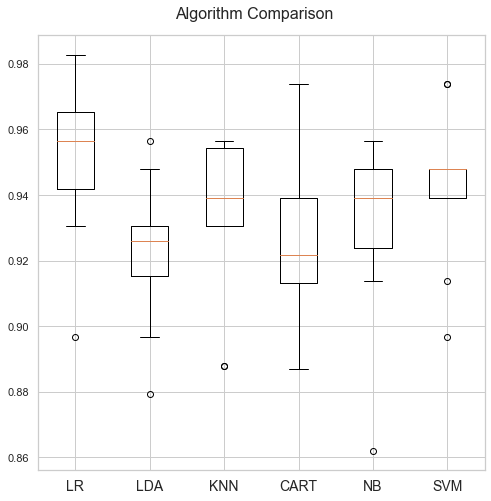

In [30]:
evaluate_algorithms(x_scaled, y_under)

 **Observation:**

<div style="background-color:#fcf8e3;border-color:#faebcc;color:#555555;">As you can see scaling the features improved the accuracy of the algorithm around 3% when we compare it to the previous test. Now, Logistic Regression provides the best acuracy score with <b>%95.66</b></div>

## 6.6. Feature Selection using Feature Importance

In [31]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=100)
model.fit(x_scaled, y_under)
array = model.feature_importances_
print('Mean: %.3f, STD: %.3f' % (array.mean(), array.std()))
for i in range(0, len(array)):
    print ('Feature %d: %.3f' % (i, array[i]))

Mean: 0.033, STD: 0.035
Feature 0: 0.008
Feature 1: 0.024
Feature 2: 0.021
Feature 3: 0.061
Feature 4: 0.083
Feature 5: 0.017
Feature 6: 0.015
Feature 7: 0.029
Feature 8: 0.011
Feature 9: 0.019
Feature 10: 0.064
Feature 11: 0.085
Feature 12: 0.087
Feature 13: 0.007
Feature 14: 0.154
Feature 15: 0.007
Feature 16: 0.055
Feature 17: 0.087
Feature 18: 0.045
Feature 19: 0.020
Feature 20: 0.011
Feature 21: 0.017
Feature 22: 0.008
Feature 23: 0.010
Feature 24: 0.007
Feature 25: 0.007
Feature 26: 0.007
Feature 27: 0.014
Feature 28: 0.009
Feature 29: 0.011


 **Observation:**

<div style="background-color:#fcf8e3;border-color:#faebcc;color:#555555;">We'll select V4, V12, V14, V16 and V17 which have high importance values.</div>

LR - Mean ACC: 95.14% STD(0.02)
LDA - Mean ACC: 91.50% STD(0.02)
KNN - Mean ACC: 94.28% STD(0.02)
CART - Mean ACC: 92.10% STD(0.02)
NB - Mean ACC: 94.45% STD(0.02)
SVM - Mean ACC: 94.71% STD(0.02)


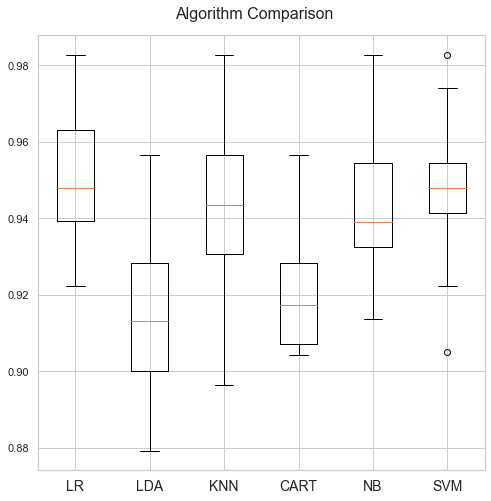

In [32]:
evaluate_algorithms(x_scaled[:, [4, 12, 14, 16, 17]], y_under)

 **Observation:**

<div style="background-color:#fcf8e3;border-color:#faebcc;color:#555555;">As can be seen in the above chart again Logistic Regression provides the best accuracy score however, Logistic Regression without feature selection still provides the best overall acuracy score with <b>%95.66</b> without feature selection.</div>

# 7. Finalize Model <a id='finalize-model'></a> 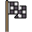

In [33]:
import warnings
warnings.filterwarnings('ignore')

# Hyper-parameter Tuning
h_params = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'penalty': ['none', 'l1', 'l2', 'elasticnet'],
              'C': [100, 10, 1.0, 0.1, 0.01]}
model = LogisticRegression()

kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=h_params, cv=kfold)
grid.fit(x_scaled, y_under)

print('Best score: %.2f%%' % (grid.best_score_*100))
print('Best params; ', grid.best_params_)

Best score: 95.23%
Best params;  {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}


 **Observation:**
<div style="background-color:#fcf8e3;border-color:#faebcc;color:#555555;">The best hyper-parameter configuration is printed above and with this config the model can achieve <b>%95.40</b> accuracy score. We'll train and test model using these hyper-parameters.</div>

# 8. Test Model <a id='test-model'></a> 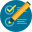

In [34]:
# to test the model, first we need to train it.
lr = LogisticRegression(C=100, penalty='none', solver='newton-cg')
lr.fit(x_scaled, y_under)

LogisticRegression(C=100, penalty='none', solver='newton-cg')

In [35]:
predictions = lr.predict(fit.transform(x_test))
y_test_cat = label_encoder.fit_transform(y_test)
print('Accuracy score: %.2f%%' % (accuracy_score(y_test_cat, predictions) * 100))
print(classification_report(y_test_cat, predictions))

Accuracy score: 98.21%
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56657
           1       0.08      0.92      0.14        89

    accuracy                           0.98     56746
   macro avg       0.54      0.95      0.57     56746
weighted avg       1.00      0.98      0.99     56746



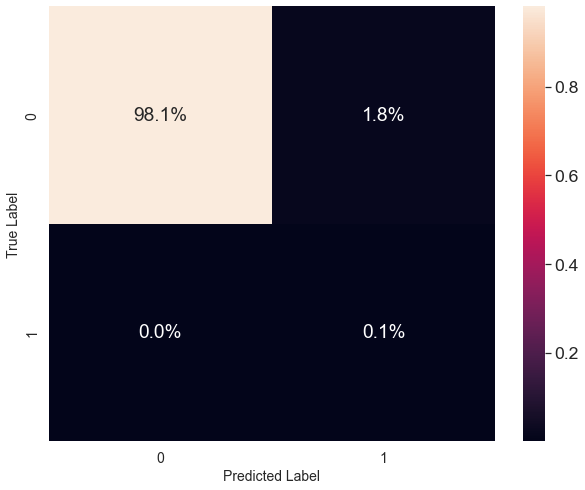

In [36]:
# Plot the confusion matrix
cf_matrix = confusion_matrix(y_test_cat, predictions)
fig = plt.subplots(figsize=(10, 8))
sb.set(font_scale=1.6)
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.1%')
plt.xlabel('Predicted Label', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# 9. Conclusion <a id='conclusion'></a> 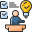

The purpose of this study wasy to create a model that can detect the fraudulent transactions based on the given features. The given dataset was in highly imbalanced state. First, we split the dataset into two, train and test. We put aside 20% of the dataset for testing purposes. Then we evaluated 5 (it should be 6 but SVM took a lot of time with the current configuration of my laptop. That's why it's removed.) algorithms with the current state of the dataset to set a baseline. The results were deceptive as explained in the observation part of the section 6.2.

Second, we balanced the dataset by using Random Under Sampler feature of Python and created a sample dataset which's majority class have 50% more observations than the minority class. And evaluated the 6 algorithms and the results were promissing.

Third, we applied standard scaler as some of the features have wide range of minimum and maximum values. Sceling imporved the results slightly. Removing outliers caused imbalanced dataset that's why we decided not to apply this method for the sample dataset. Standard Scaler was fitted on the training dataset not to cause any <ins>dataleak</ins>.

Forth, we tried the reduce the number of features by using Feature Importance by adapting Extra Trees Classifier algorithm but unfortunately it had a negative impact on the results.

After deciding how to process the data and the algorithm, we found the best hyper-parameters using Grid Search Cross Validation on Logistic Regression which provided the best accuracy score on a dataset which was balanced and scaled.

Finally, we trained the model one last time with the selected hyper-parameters and then tested it on the test dataset. The accuracy score of the proposed model is **98.21%** which is a promissing value to detect fraudelent credit card transactions. The reason behind that the cofusion matrix looks a bit weird is that as you may remember we created the test dataset from the imbalanced dataset. That's why the number of true and predicted labels for class 1 is very few.

As a next step, different type of feature selection methods and/or scaling methods can be applied to improve the performance. In addition to this, dataset can be balanced using SMOTE and the performance of the model can be tested under big amount of observations.